In [19]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from igdb_api_python.igdb import igdb

from config import api_key,client_id
#print(api_key)

In [213]:
metacritic_df = pd.read_csv('result.csv')

metacritic_df.head()
# lookup_2018 = metacritic_df.loc[:,metacritic_df['date']]
# lookup_2018

#Exploring to find where year is
#TEST-Want to separate date by month day and year
metacritic_df['date'].head()
lookup_one = metacritic_df.loc[0,['date']]
date = lookup_one.tolist()

#find where year is
for i in lookup_one:
    year = i.split()
#display year
year[-1]

#Get whole date
dates = date[0].split()
#dates

unique_names = metacritic_df['name'].unique()
#print(unique_names[0])
for i in range(10):
    print(unique_names[i])
metacritic_df.head()
dates

Grand Theft Auto V
The Last of Us
BioShock Infinite
Super Mario 3D World
Fire Emblem: Awakening
Rayman Legends
Fez
The Legend of Zelda: A Link Between Worlds
flower
Spelunky


'2013'

In [214]:
#Testing Giantbomb api url
base_url = f"http://www.giantbomb.com/api/game/3030-4725/?api_key={api_key}&format=json&field_list=name,characters,developers,genres,objects,publishers,dlcs,themes,guid"

#print(base_url)
#print(search_url)

In [190]:
#Custom header needed to prove human
headers = {'User-Agent': 'GanDataVizProject', 'From': 'ENTER EMAIL'}
response = requests.get(base_url, headers=headers).json()

In [191]:
pprint(response)

{'error': 'OK',
 'limit': 1,
 'number_of_page_results': 1,
 'number_of_total_results': 1,
 'offset': 0,
 'results': {'characters': [{'api_detail_url': 'https://www.giantbomb.com/api/character/3005-99/',
                             'id': 99,
                             'name': 'Samus Aran',
                             'site_detail_url': 'https://www.giantbomb.com/samus-aran/3005-99/'},
                            {'api_detail_url': 'https://www.giantbomb.com/api/character/3005-1305/',
                             'id': 1305,
                             'name': 'Ridley',
                             'site_detail_url': 'https://www.giantbomb.com/ridley/3005-1305/'},
                            {'api_detail_url': 'https://www.giantbomb.com/api/character/3005-3663/',
                             'id': 3663,
                             'name': 'Dark Samus',
                             'site_detail_url': 'https://www.giantbomb.com/dark-samus/3005-3663/'},
                            {'a

In [192]:
#Searching for genre info
#print(response['results']['genres'][0]['name'])
for item in response['results']['genres']:
    print(item['name'])

First-Person Shooter
Platformer
Action-Adventure


In [193]:
#Testing how to search for specific game, looking for release info
release_url = f"http://www.giantbomb.com/api/game/3030-4725/?api_key={api_key}&format=json&field_list=releases"
search = "street_fighter"
search_url = f"http://www.giantbomb.com/api/search/?api_key={api_key}&format=json&query={search}&resources=game&field_list=guid"
release_response = requests.get(release_url, headers= headers).json()
pprint(release_response)
#print(search_url)

{'error': 'OK',
 'limit': 1,
 'number_of_page_results': 1,
 'number_of_total_results': 1,
 'offset': 0,
 'results': {'releases': [{'api_detail_url': 'https://www.giantbomb.com/api/release/3050-12141/',
                           'id': 12141,
                           'name': 'Metroid Prime 3: Corruption',
                           'site_detail_url': 'https://www.giantbomb.com/metroid-prime-3-corruption/3030-4725/releases/'},
                          {'api_detail_url': 'https://www.giantbomb.com/api/release/3050-12143/',
                           'id': 12143,
                           'name': 'Metroid Prime 3: Corruption',
                           'site_detail_url': 'https://www.giantbomb.com/metroid-prime-3-corruption/3030-4725/releases/'},
                          {'api_detail_url': 'https://www.giantbomb.com/api/release/3050-12144/',
                           'id': 12144,
                           'name': 'Metroid Prime 3: Corruption',
                           'site_detai

In [194]:
#Grab release guid needed for release info
release_guid = release_response['results']['releases'][1]['id']

#Get release info
guid_url = f"http://www.giantbomb.com/api/release/3050-{release_guid}/?api_key={api_key}&format=json&field_list=multiplayer_features,singleplayer_features,maximum_players,minimum_players,resolutions"

guid_response = requests.get(guid_url, headers= headers).json()
pprint(guid_response)

{'error': 'OK',
 'limit': 1,
 'number_of_page_results': 1,
 'number_of_total_results': 1,
 'offset': 0,
 'results': {'maximum_players': None, 'minimum_players': 1},
 'status_code': 1,
 'version': '1.0'}


In [195]:
sales_df = pd.read_csv('Video_Games_Sales.csv')
sales_df.head()
cleaned_sales_df = sales_df.dropna(how = 'any')
cleaned_sales_df.head()
#len(cleaned_sales_df['Name'].unique())

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


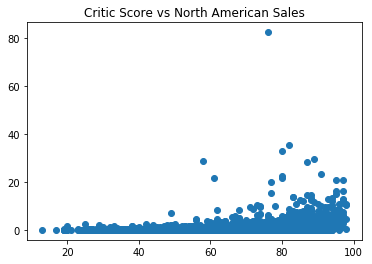

In [196]:
plt.scatter(cleaned_sales_df['Critic_Score'],cleaned_sales_df['Global_Sales'])
plt.title("Critic Score vs North American Sales")
plt.show()

In [197]:
# plt.bar(cleaned_sales_df['User_Score'],cleaned_sales_df['Global_Sales'])
# plt.show()

In [198]:
#Create bins for critic score
bins = [0,9,19,29,39,49,59,69,79,89,100]
group_names = ["J","I","H","G","F","E","D","C","B","A"]

#Alternative labels
#group_names = ["<10","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90+"]

cleaned_sales_df['Critical Rank'] = pd.cut(cleaned_sales_df['Critic_Score'], bins,labels = group_names)

cleaned_sales_df

C:\Users\Link\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Critical Rank
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,C
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,B
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,B
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,B
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,B
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E,A
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E,B
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E,D
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E,B


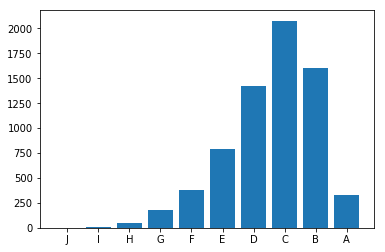

In [199]:
critic_group = cleaned_sales_df.groupby(['Critical Rank'])
#critic_group['Critic_Score'].count()
plt.bar(group_names,critic_group['Critic_Score'].count())
plt.show()
#cleaned_sales_df["Critic_Score"].value_counts()

In [200]:
#Convert user score column data to float
# user_score = cleaned_sales_df['User_Score'].tolist()
# user_score_adj = []
# for item in user_score:
#     user_score_adj.append(float(item))
# cleaned_sales_df['User_Score'] = user_score_adj
# cleaned_sales_df

#Better way to convert user score to float
converted_series = pd.to_numeric(cleaned_sales_df['User_Score'])
cleaned_sales_df['User_Score'] = converted_series
binz = [0,0.9,1.9,2.9,3.9,4.9,5.9,6.9,7.9,8.9,10.0]

#Alternative labels
#group_namez = ["<1","1.0-1.9","2.0-2.9","3.0-3.9","4.0-4.9","5.0-5.9","6.0-6.9","7.0-7.9","8.0-8.9","9.0+"]

cleaned_sales_df['User Rank'] = pd.cut(cleaned_sales_df['User_Score'], binz,labels = group_names)
cleaned_sales_df

C:\Users\Link\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Link\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Critical Rank,User Rank
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,C,B
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,B,B
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,B,B
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,B,B
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,E,D
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,B,B
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E,A,B
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E,B,C
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E,D,D
15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,Nintendo,E,B,C


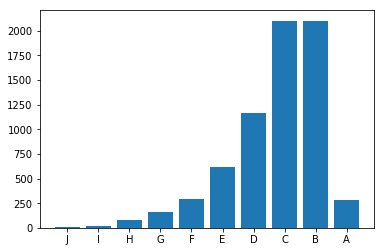

In [201]:
user_group = cleaned_sales_df.groupby(['User Rank'])
#critic_group['Critic_Score'].count()
plt.bar(group_names,user_group['User_Score'].count())
plt.show()
# print(critic_group['Critic_Score'].count())
# print(user_group['User_Score'].count())